In [20]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('../data/crawler/unified-events-time-statistics.csv')
df.head()

golId  time  result  blueTopGP  blueTopWR  blueTopKDA  blueJungleGP  \
0  35797     0       0          0        0.0         0.0             0   
1  35797     1       0          0        0.0         0.0             0   
2  35797     2       0          0        0.0         0.0             0   
3  35797     3       0          0        0.0         0.0             0   
4  35797     4       0          0        0.0         0.0             0   

   blueJungleWR  blueJungleKDA  blueMidGP  ...  RED:third_tower_top  \
0           0.0            0.0          0  ...                    0   
1           0.0            0.0          0  ...                    0   
2           0.0            0.0          0  ...                    0   
3           0.0            0.0          0  ...                    0   
4           0.0            0.0          0  ...                    0   

   RED:third_tower_mid  RED:third_tower_bot  RED:inhibitor_top  \
0                    0                    0                  0   
1                    0                    0                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

   RED:inhibitor_mid  RED:inhibitor_bot  RED:baron  RED:elder_dragon  \
0                  0                  0          0                 0   
1                  0                  0          0                 0   
2                  0                  0          0                 0   
3                  0                  0          0                 0   
4                  0                  0          0                 0   

   RED:nexus_tower  RED:nexus  
0                0          0  
1                0          0  
2                0          0  
3                0          0  
4                0          0  

[5 rows x 73 columns]

In [22]:
y = df['result'].copy()
X = df.drop(['golId','result','time'],axis=1)
X.head()

blueTopGP  blueTopWR  blueTopKDA  blueJungleGP  blueJungleWR  \
0          0        0.0         0.0             0           0.0   
1          0        0.0         0.0             0           0.0   
2          0        0.0         0.0             0           0.0   
3          0        0.0         0.0             0           0.0   
4          0        0.0         0.0             0           0.0   

   blueJungleKDA  blueMidGP  blueMidWR  blueMidKDA  blueADCGP  ...  \
0            0.0          0        0.0         0.0          0  ...   
1            0.0          0        0.0         0.0          0  ...   
2            0.0          0        0.0         0.0          0  ...   
3            0.0          0        0.0         0.0          0  ...   
4            0.0          0        0.0         0.0          0  ...   

   RED:third_tower_top  RED:third_tower_mid  RED:third_tower_bot  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   RED:inhibitor_top  RED:inhibitor_mid  RED:inhibitor_bot  RED:baron  \
0                  0                  0                  0          0   
1                  0                  0                  0          0   
2                  0                  0                  0          0   
3                  0                  0                  0          0   
4                  0                  0                  0          0   

   RED:elder_dragon  RED:nexus_tower  RED:nexus  
0                 0                0          0  
1                 0                0          0  
2                 0                0          0  
3                 0                0          0  
4                 0                0          0  

[5 rows x 70 columns]

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model

# Carregar e preprocessar os dados
# Aqui, supomos que você já tenha carregado e pré-processado seu dataset

# Definir o número de features (dimensões de entrada)
num_features = len(X.columns)

# Normalizar os dados
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# Construir o modelo autoencoder
input_layer = Input(shape=(num_features,))
encoded = Dense(32, activation='relu')(input_layer) # Camada de encoding
decoded = Dense(num_features, activation='sigmoid')(encoded) # Camada de decoding

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # Usando MSE como função de custo

# Treinar o modelo
autoencoder.fit(scaled_data, scaled_data, epochs=20, batch_size=32, shuffle=True)

# Obter a representação latente (encoding) dos dados
encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(scaled_data)

# Os dados codificados estão em 'encoded_data'


Epoch 1/20
6110/6110 [==============================] - 15s 2ms/step - loss: 0.1959
Epoch 2/20
6110/6110 [==============================] - 13s 2ms/step - loss: 0.1657
Epoch 3/20
6110/6110 [==============================] - 13s 2ms/step - loss: 0.1643
Epoch 4/20
6110/6110 [==============================] - 14s 2ms/step - loss: 0.1637
Epoch 5/20
6110/6110 [==============================] - 14s 2ms/step - loss: 0.1633
Epoch 6/20
6110/6110 [==============================] - 13s 2ms/step - loss: 0.1630
Epoch 7/20
6110/6110 [==============================] - 12s 2ms/step - loss: 0.1628
Epoch 8/20
6110/6110 [==============================] - 12s 2ms/step - loss: 0.1626
Epoch 9/20
6110/6110 [==============================] - 12s 2ms/step - loss: 0.1625
Epoch 10/20
6110/6110 [==============================] - 13s 2ms/step - loss: 0.1624
Epoch 11/20
6110/6110 [==============================] - 14s 2ms/step - loss: 0.1623
Epoch 12/20
6110/6110 [==============================] - 13s 2ms/step - lo

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

def preprocess_input(X,y):
    X = X.copy()
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,stratify=y,random_state=42)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = preprocess_input(X,y)

input_dim = X.shape[1]  # Número de features
encoding_dim = 32  # Escolha o número de neurônios na camada de encoding

autoencoder = models.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(encoding_dim, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

decoded_data = autoencoder.predict(X_test)
bce = tf.keras.losses.BinaryCrossentropy(X_test, decoded_data)


Epoch 1/50
4888/4888 [==============================] - 17s 3ms/step - loss: 0.2023 - val_loss: 0.1680
Epoch 2/50
4888/4888 [==============================] - 16s 3ms/step - loss: 0.1662 - val_loss: 0.1652
Epoch 3/50
4888/4888 [==============================] - 15s 3ms/step - loss: 0.1648 - val_loss: 0.1643
Epoch 4/50
4888/4888 [==============================] - 15s 3ms/step - loss: 0.1641 - val_loss: 0.1639
Epoch 5/50
4888/4888 [==============================] - 16s 3ms/step - loss: 0.1637 - val_loss: 0.1635
Epoch 6/50
4888/4888 [==============================] - 15s 3ms/step - loss: 0.1634 - val_loss: 0.1632
Epoch 7/50
4888/4888 [==============================] - 15s 3ms/step - loss: 0.1631 - val_loss: 0.1630
Epoch 8/50
4888/4888 [==============================] - 16s 3ms/step - loss: 0.1629 - val_loss: 0.1628
Epoch 9/50
4888/4888 [==============================] - 16s 3ms/step - loss: 0.1627 - val_loss: 0.1627
Epoch 10/50
4888/4888 [==============================] - 16s 3ms/step - l

In [25]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Supondo que 'autoencoder' é o modelo treinado e 'X_test' são os dados de teste
encoded_features = autoencoder.predict(X_test)  # Obtém as características abstratas

# Aplica t-SNE para reduzir a dimensionalidade para 2 para visualização
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(encoded_features)


1222/1222 [==============================] - 3s 3ms/step


c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



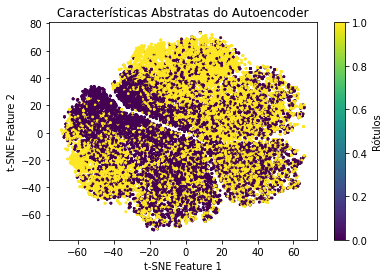

In [26]:
# Cria um scatter plot das características abstratas
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=y_test, cmap='viridis',s=3)
plt.title('Características Abstratas do Autoencoder')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Rótulos')
plt.show()

In [27]:
from sklearn.manifold import TSNE
import plotly.offline as py

fig = {
    "data": [
        {
            "x": encoded_features[:, 0],
            "y": encoded_features[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")